# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key

### Import API Keys

## Generate Cities List

Generate a list of unique cities based on a random latitude and longitude and using citypy library

In [2]:
# Size of the list of cities
num_cities = 5
latitude_max = 90
longitude_max = 180

cities_list = []
country_list = []
lat_list = []
lng_list = []


while len(cities_list) < num_cities:
    
    # Generate a random latitude using numpy random array multiplied by 90 that is the maximum for latitude
    # and multiple by a random +1 or -1 to give the North or South from Equator
    lat_random = ((latitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Generate a random longitude using numpy random array multiplied by 180 that is the maximum for longitude
    # and multiple by a random +1 or -1 to give the East or West from Greenwich
    lon_random = ((longitude_max*np.random.rand(1,1))*(np.random.randint(2, size=1)*2-1))

    # Create a list of cities based on the random coordinates and using the citypy library
    city = citipy.nearest_city(lat_random[0][0], lon_random[0][0])
    new_city = city.city_name.title()
    new_city_country = city.country_code.upper()
    

    # Logical test to verify if the city is already include in the list or not
    if new_city not in cities_list:
        cities_list.append(new_city)
        country_list.append(new_city_country)
        lat_list.append(lat_random[0][0])
        lng_list.append(lon_random[0][0])

        
print(f'List of cities has {len(cities_list)} cities.')

List of cities has 5 cities.


In [3]:
# Create a dataframe with the random latitude and longitude

cities_df = pd.DataFrame({'City':cities_list,
                          'Lat':lat_list,
                          'Lng':lng_list,
                          'Max Temp':'',
                          'Humidity':'',
                          'Cloudiness':'',
                          'Wind Speed':'',
                          'Country':country_list,
                          'Date':''})

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acari,-18.186235,-75.420501,,,,,PE,
1,Kapaa,17.459679,-162.974279,,,,,US,
2,Srednekolymsk,69.031643,152.304190,,,,,RU,
3,Dumai,1.479147,101.564848,,,,,ID,
4,Qandala,11.577472,49.782101,,,,,SO,


In [4]:
# Double check if the list only has unique cities
print(f"The list of cities has {len(cities_df['City'].unique())} unique cities.")


The list of cities has 5 unique cities.


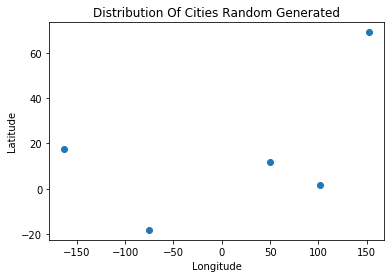

In [5]:
# Generate a scatterplot of the random coordinates.
# Note that coordinates looks to be evenly distributed.
# since the numpy random number distribution has uniform distribution

plt.scatter(x=cities_df['Lng'], y=cities_df['Lat'])
plt.title('distribution of cities random generated'.title())
plt.xlabel('Longitude')
plt.ylabel('Latitude');

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
hum = []
max_temp = []
cloudiness = []
wind_speed = []
time_data_calculation = []
n = 0

# Loop through the list of cities and perform a request for data on each
for city in cities_df['City']:
    response = requests.get(query_url + city).json()
    print(f"Processing Record {n} of {len(cities_df['City'])} | {city}")
    hum.append(response['main']['humidity'])
    max_temp.append(response['main']['temp_max'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    time_data_calculation.append(response['dt'])
    n += 1


Processing Record 0 of 5 | Acari
Processing Record 1 of 5 | Kapaa
Processing Record 2 of 5 | Srednekolymsk
Processing Record 3 of 5 | Dumai
Processing Record 4 of 5 | Qandala


In [7]:
# Update the dataframe with the data colected from the API for Max Temp, Humidity, Cloudiness, Wind Speed, Date
cities_df['Max Temp'] = max_temp
cities_df['Humidity'] = hum
cities_df['Cloudiness'] = cloudiness
cities_df['Wind Speed'] = wind_speed
cities_df['Date'] = time_data_calculation

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv('data/city_weather.csv')

In [9]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acari,-18.186235,-75.420501,61.68,60,32,2.86,PE,1599887879
1,Kapaa,17.459679,-162.974279,82.40,69,90,14.99,US,1599887879
2,Srednekolymsk,69.031643,152.304190,57.04,42,0,3.60,RU,1599887881
3,Dumai,1.479147,101.564848,85.15,79,43,2.10,ID,1599887884
4,Qandala,11.577472,49.782101,90.12,52,13,4.54,SO,1599887885


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
filter_hum = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
filter_hum

3    79
Name: Humidity, dtype: int64

In [11]:
#  Get the indices of cities that have humidity over 100%.
indexes_hum = filter_hum.keys()
indexes_hum

Int64Index([3], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df
clean_city_data.drop(clean_city_data.iloc[indexes_hum].index, inplace=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acari,-18.186235,-75.420501,61.68,60,32,2.86,PE,1599887879
1,Kapaa,17.459679,-162.974279,82.40,69,90,14.99,US,1599887879
2,Srednekolymsk,69.031643,152.304190,57.04,42,0,3.60,RU,1599887881
3,Dumai,1.479147,101.564848,85.15,79,43,2.10,ID,1599887884
4,Qandala,11.577472,49.782101,90.12,52,13,4.54,SO,1599887885


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression